## Classification model to detrmine the Attrition of the Employee

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
#counting the null values
df.isnull().sum().sum() 

0

In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
#There are three features (standard hour, over18 and StandardHours) are same and can be removed,
#Employee number is unique for all individual and has no effect on Attrition
df.drop(['StandardHours', 'Over18','EmployeeCount', 'EmployeeNumber'], inplace = True, axis=1 )

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [8]:
ct =pd.DataFrame()
nt =pd.DataFrame()
for column in df:
    if column == 'Attrition':
        pass
    elif len(df[column].unique()) <= 15:
        ct[column] =df[column]
    else:
        nt[column] =df[column]

ct['At']=np.where(df['Attrition'] == 'Yes',1,0)
nt['At']= np.where(df['Attrition'] == 'Yes',1,0)

In [9]:
nt.columns, ct.columns

(Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
        'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'At'],
       dtype='object'),
 Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
        'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'At'],
       dtype='object'))

# EDA

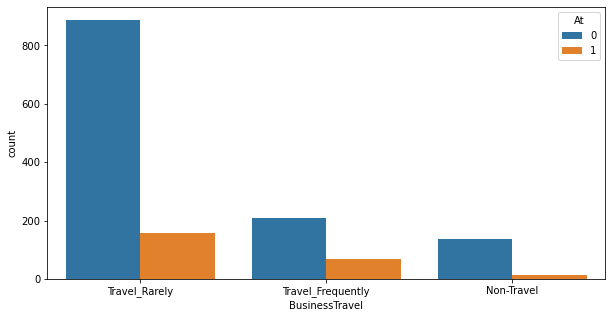

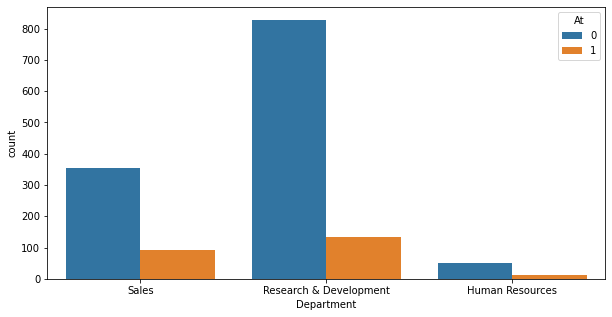

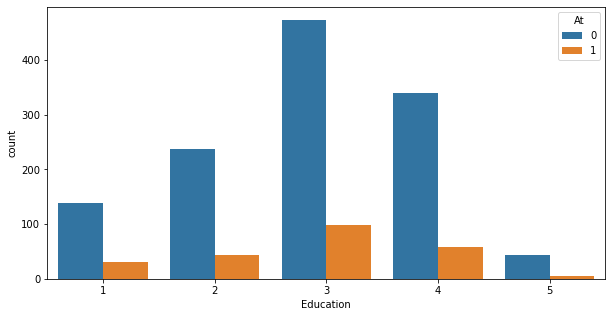

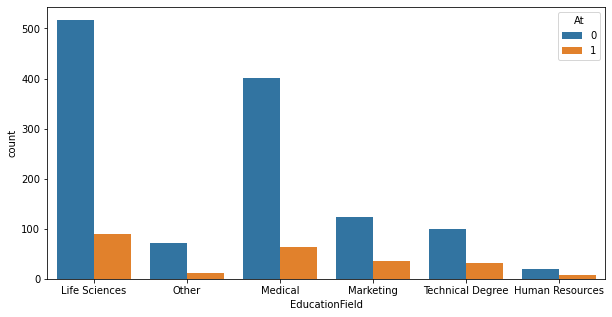

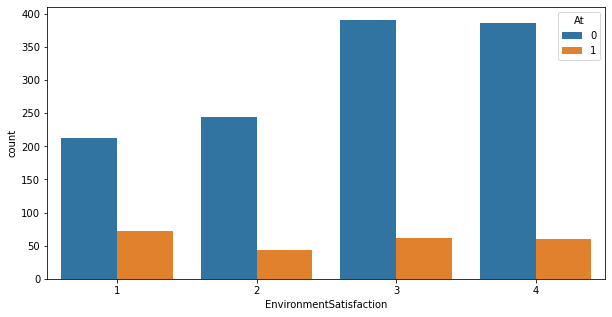

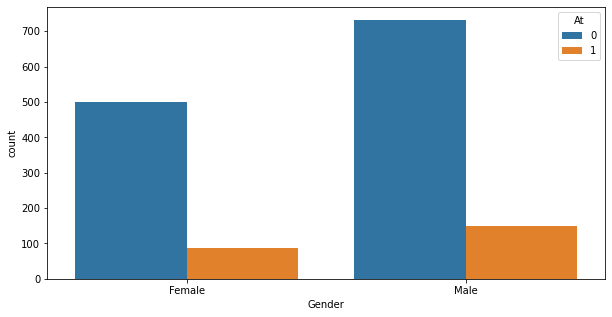

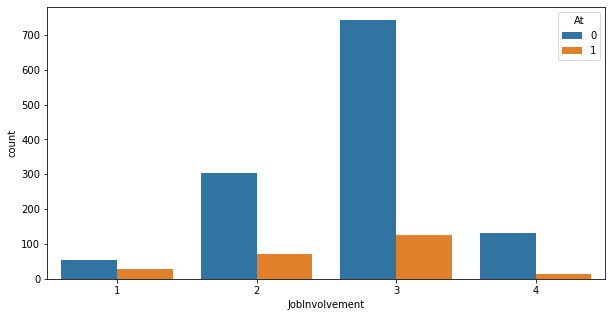

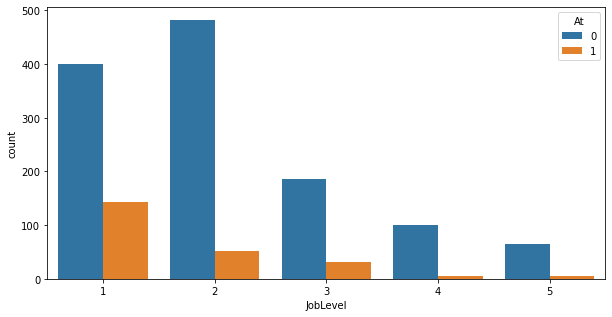

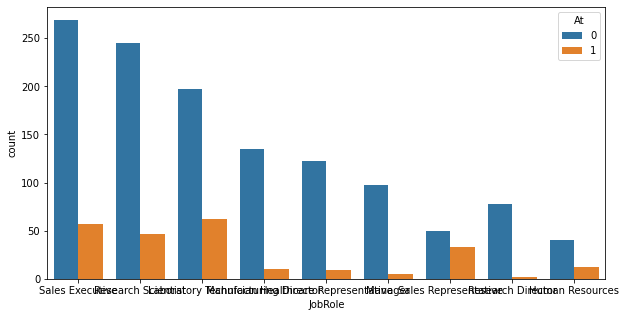

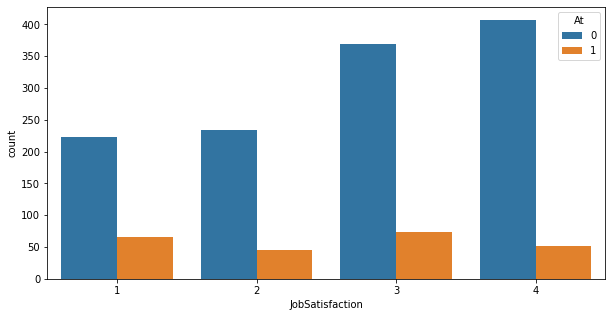

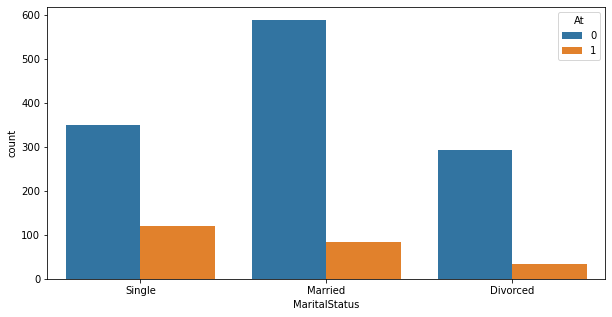

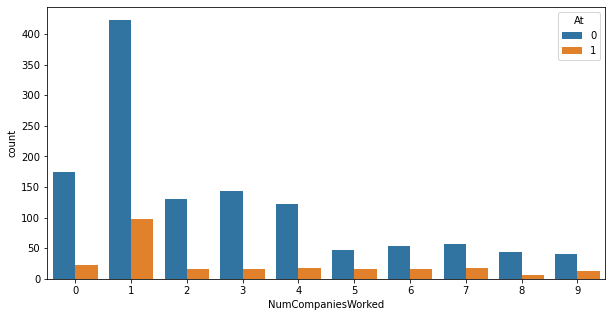

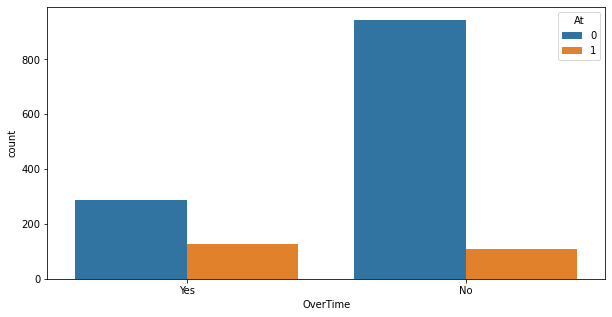

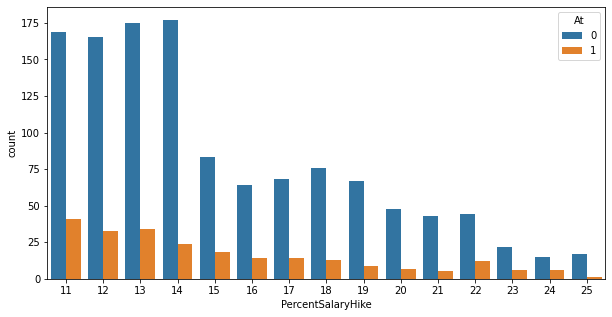

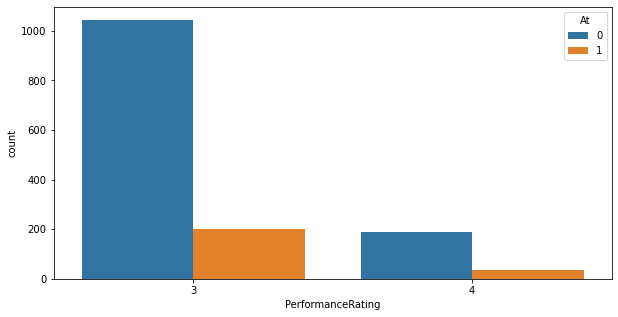

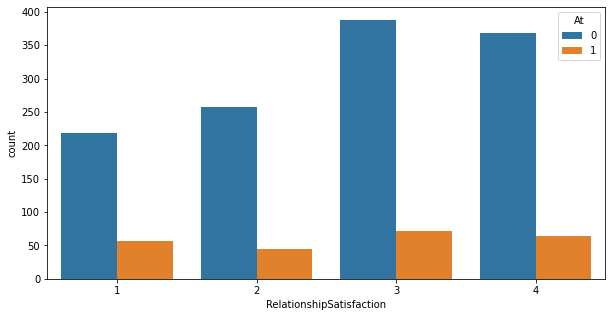

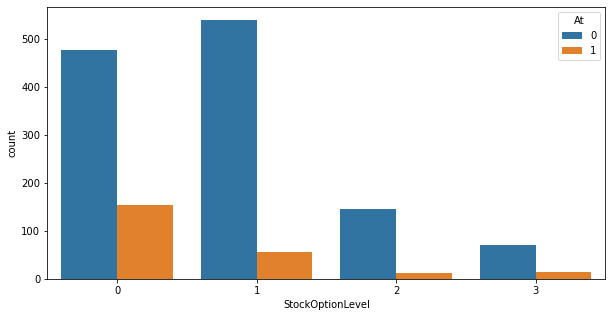

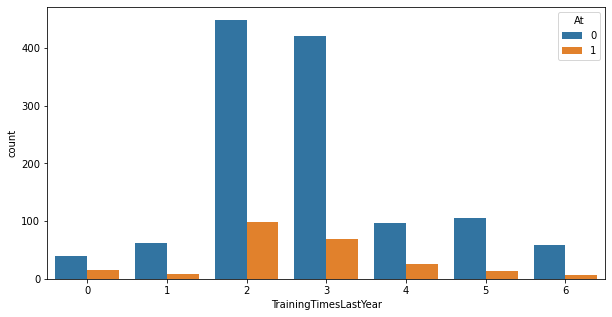

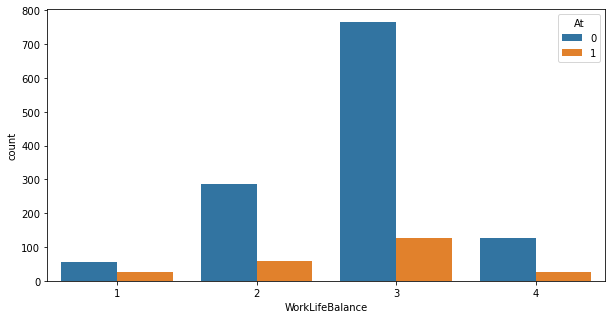

In [10]:
#Relating categorical features with the Attrition
for col in ct.columns:
    if col == 'At':
        pass
    else:
        plt.figure(figsize = (10,5))
        sns.countplot(ct[col], hue=ct['At'])
        plt.show()
        

# Conclusion
#### Overtime: People with no overtime has more negative Attrition
#### Gender: The rate of negative Attrition is similar for both gender

### Travel

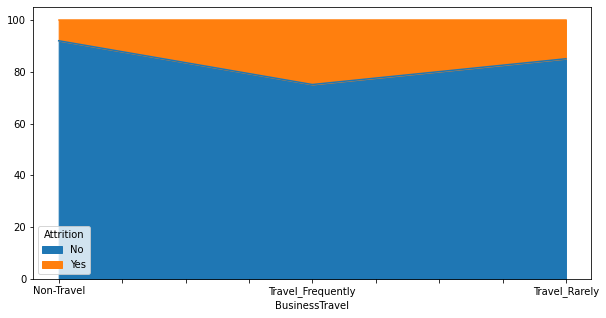

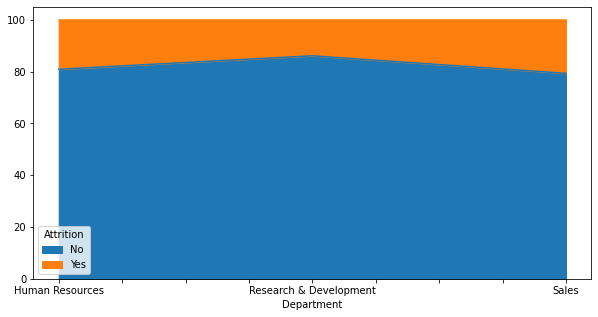

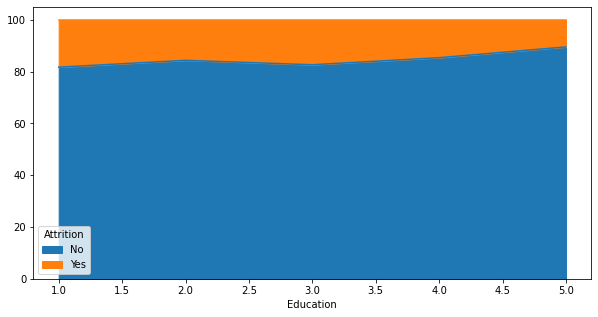

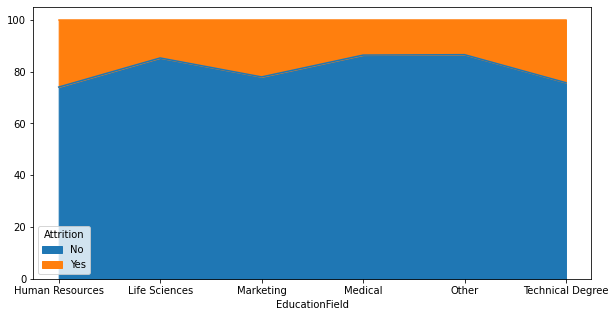

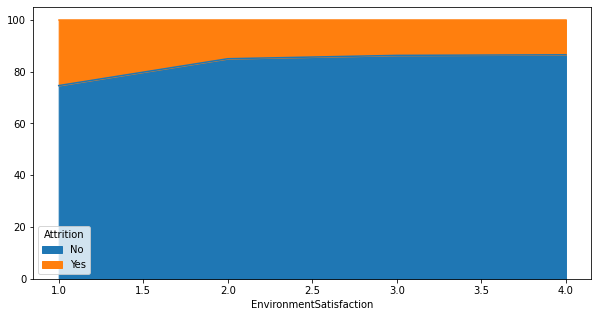

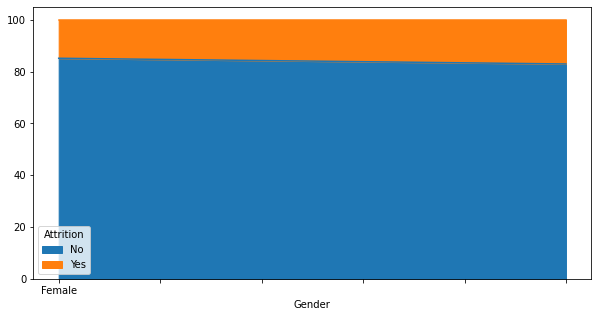

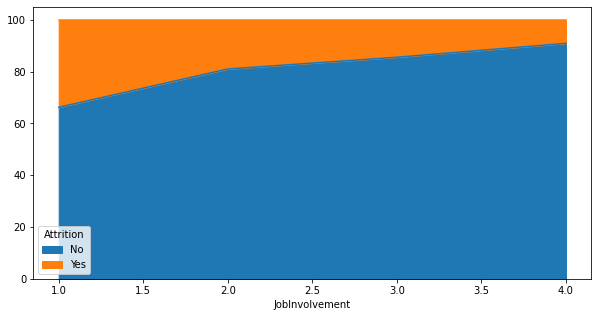

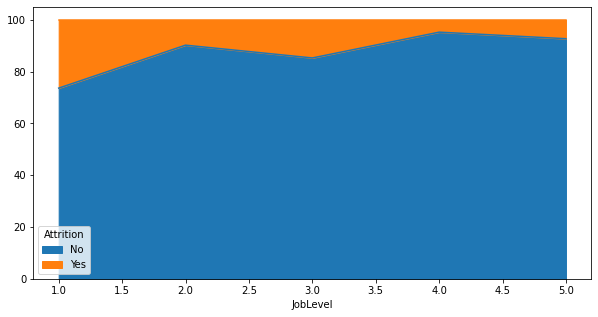

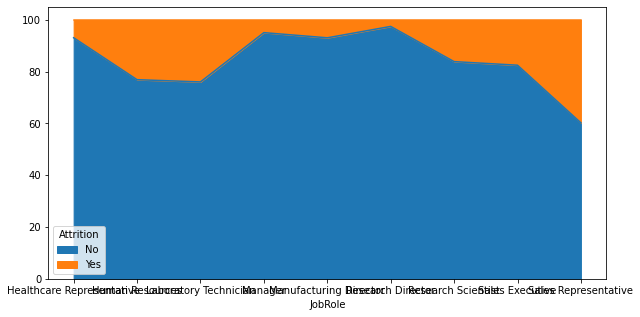

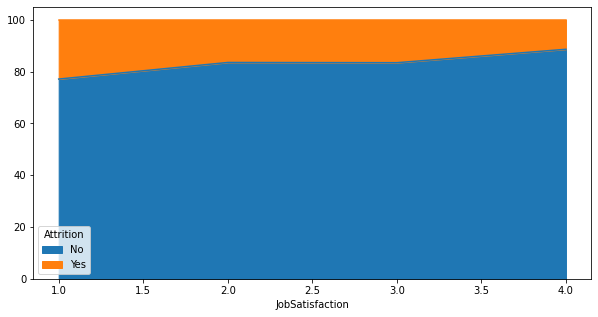

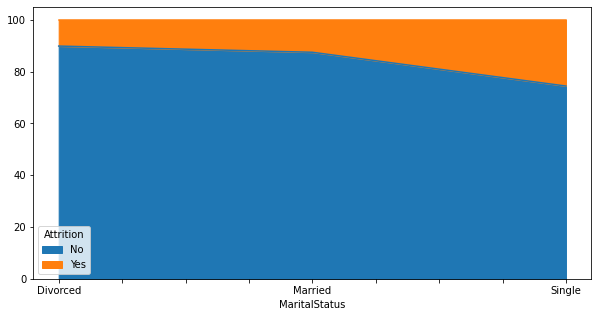

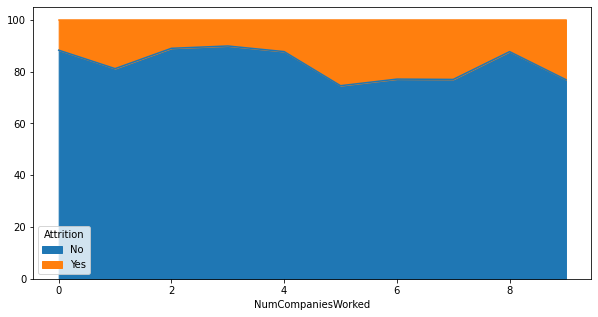

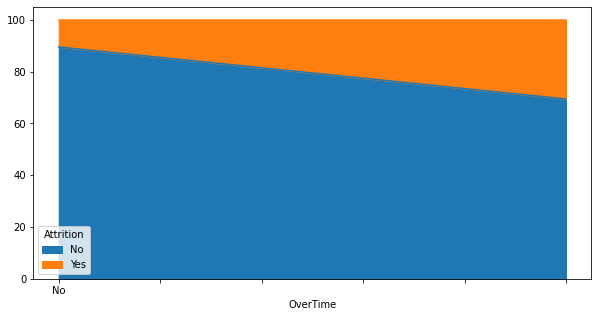

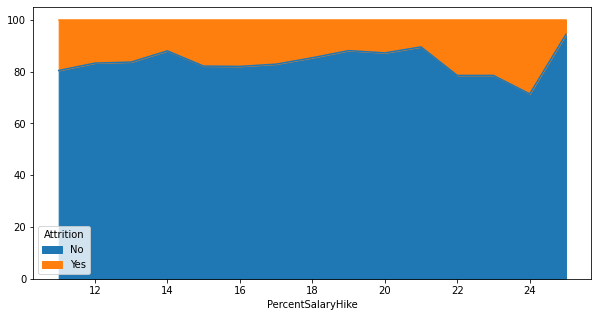

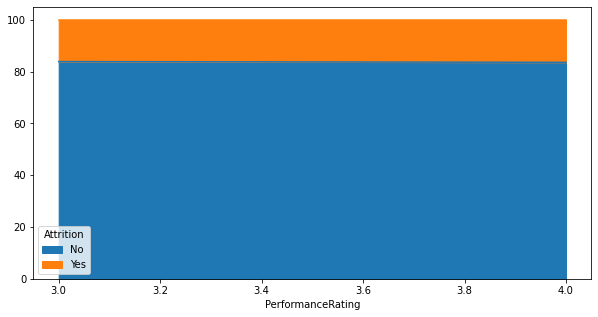

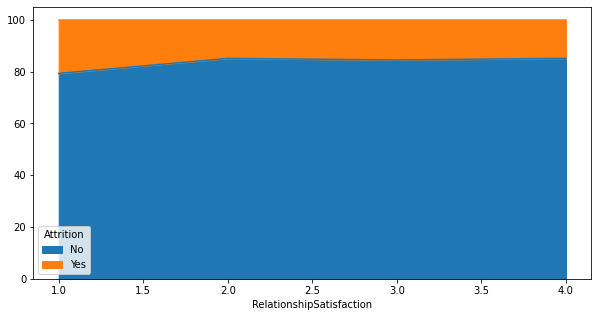

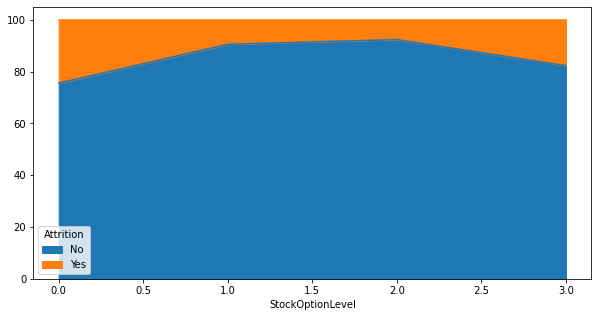

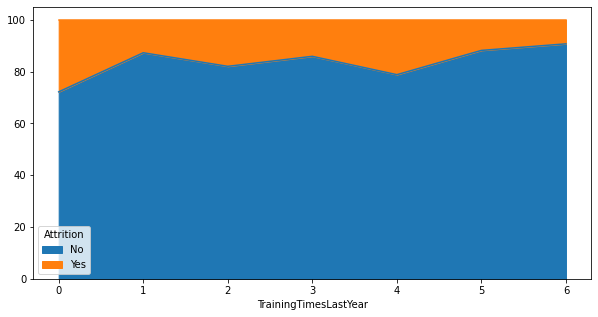

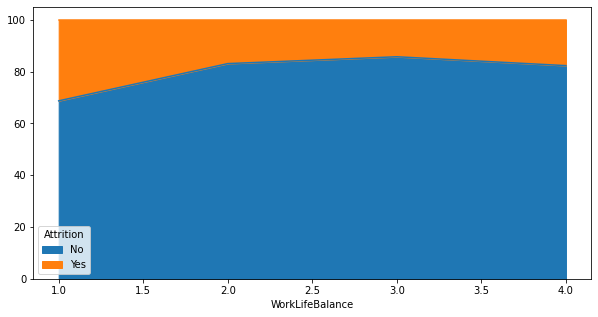

In [11]:
for col in ct.columns:
    if col == 'At':
        pass
    else:
        dt = ct[[col,'At']]
        dt['Attrition']= df['Attrition']
        temp = dt.pivot_table('At', index=col, columns = 'Attrition',  aggfunc='count')
        for i in range(len(dt[col].unique())):
            t=temp['No'].iloc[i] + temp['Yes'].iloc[i]
            temp['No'].iloc[i] = 100 *temp['No'].iloc[i]/t
            temp['Yes'].iloc[i] = 100* temp['Yes'].iloc[i]/t
        temp.plot(kind ='area', figsize = (10,5))
        plt.show()

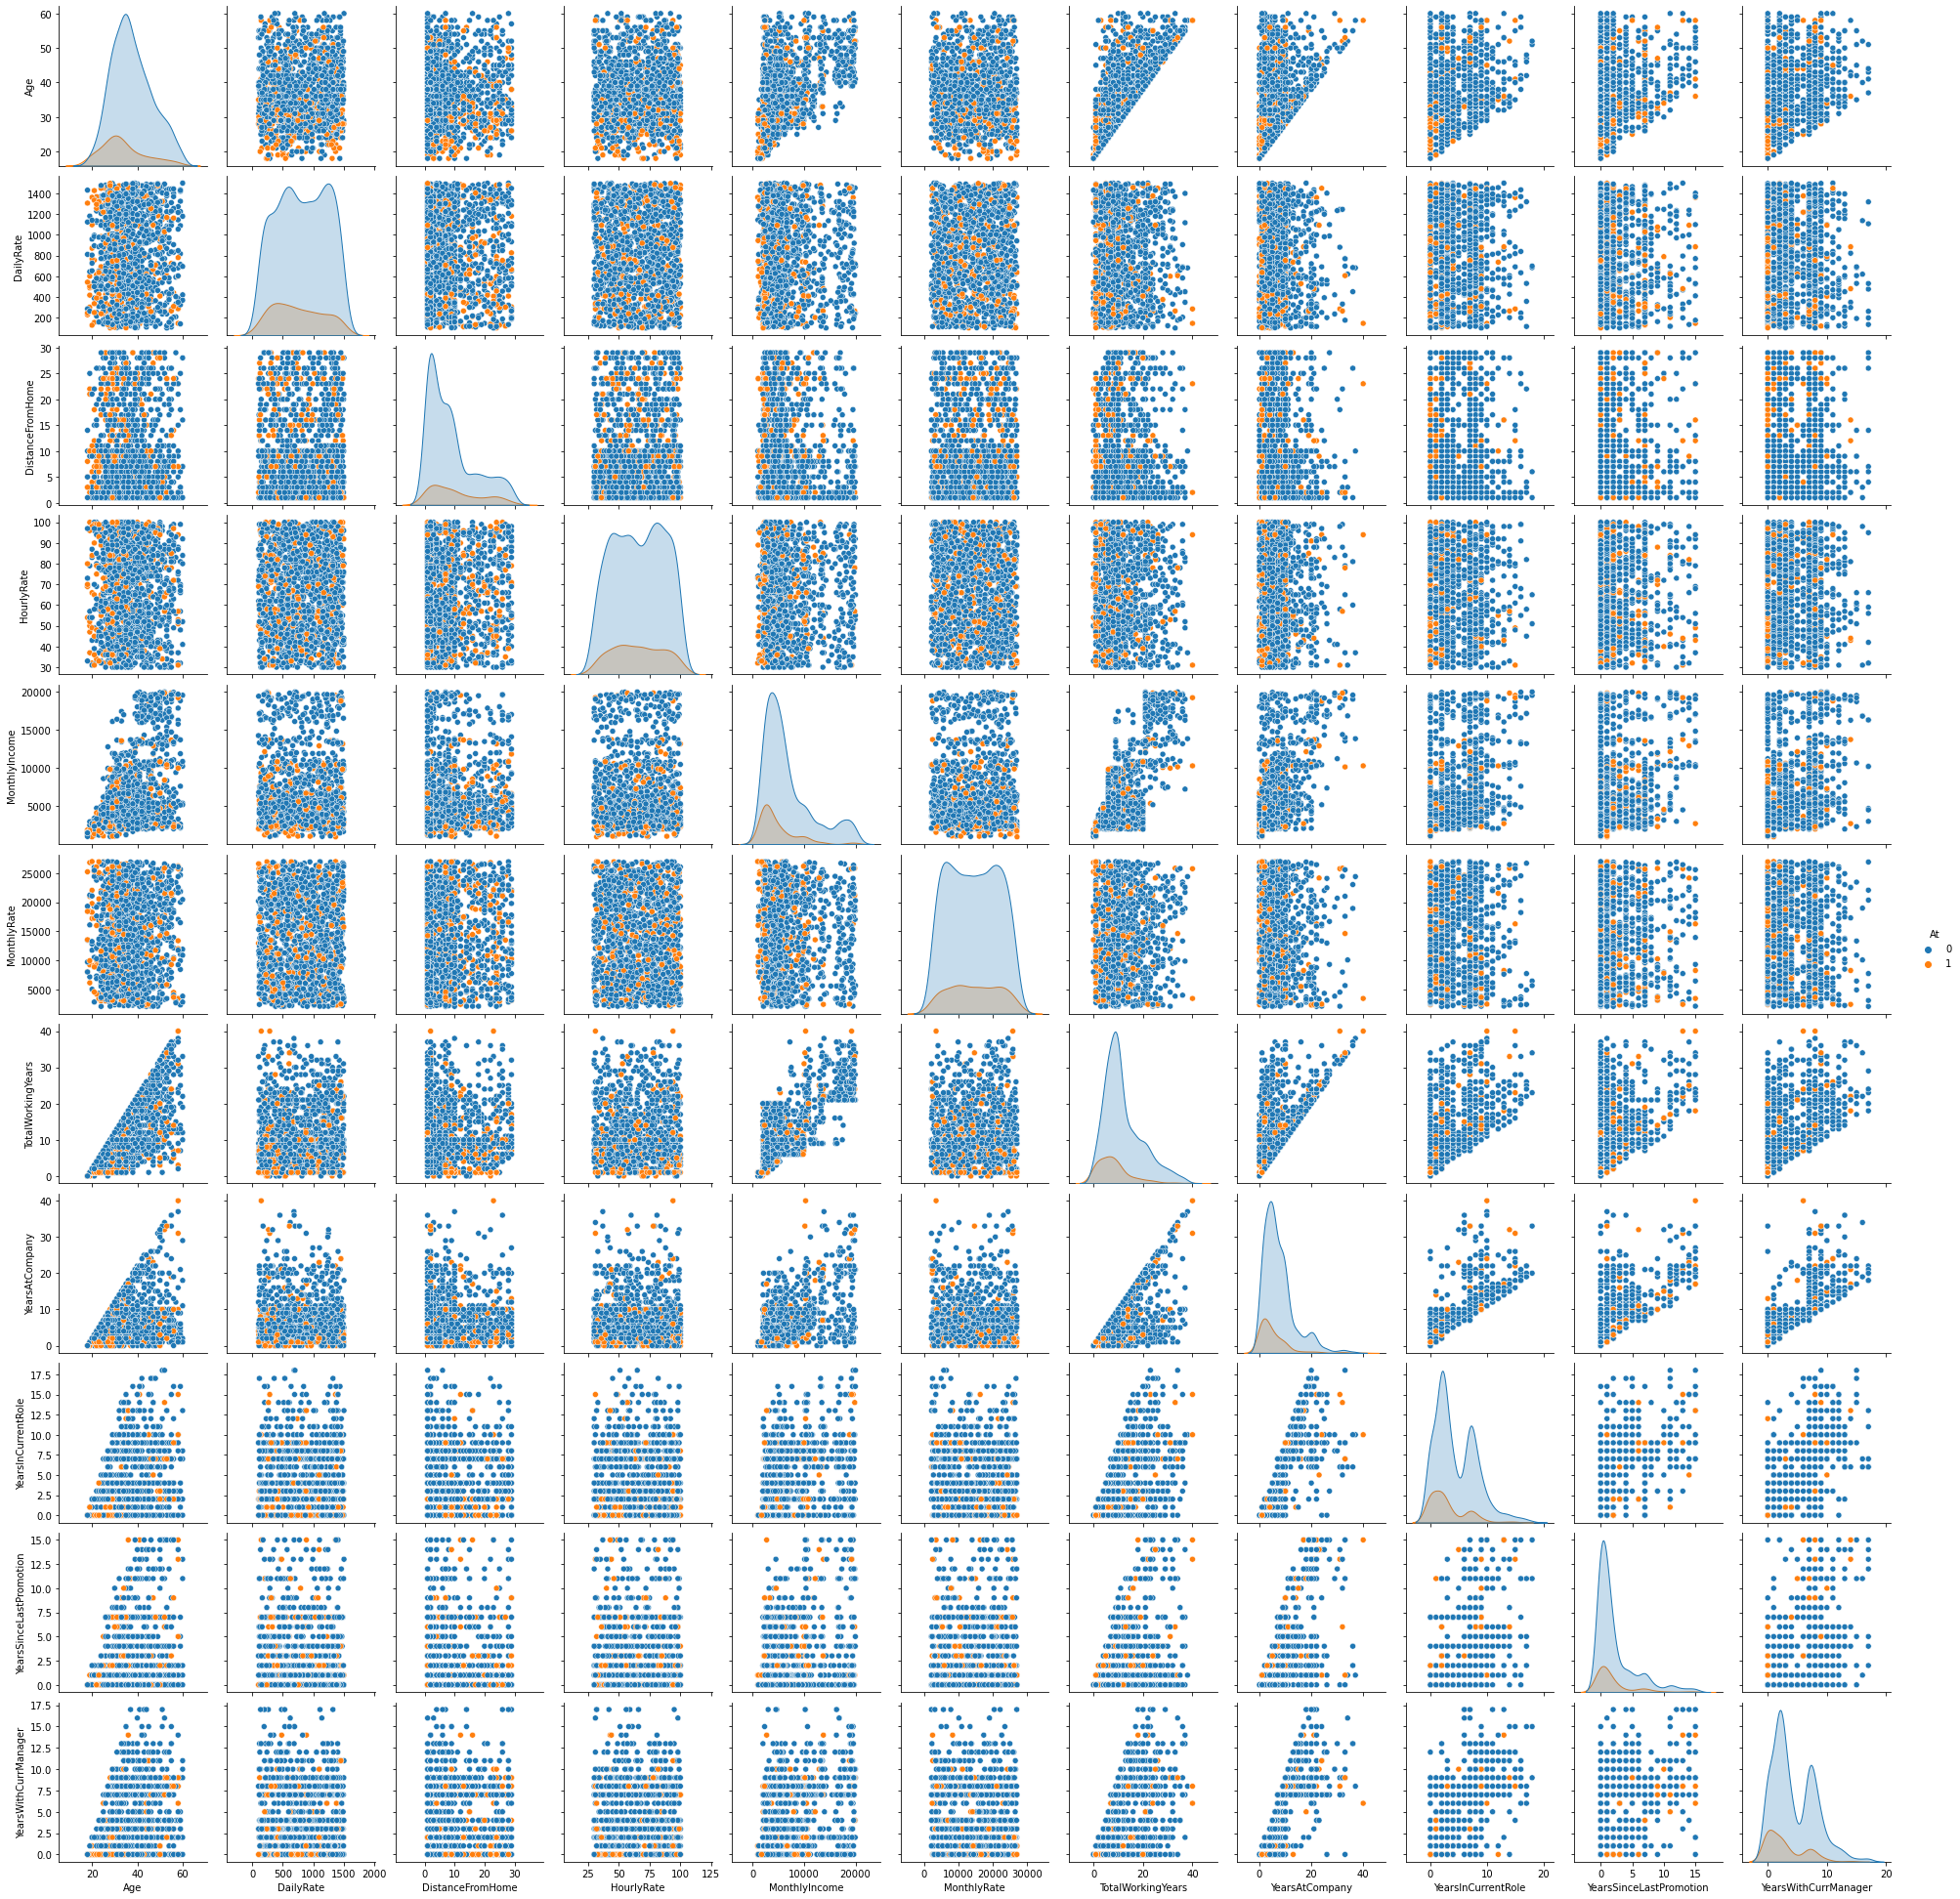

In [12]:
#Relating numerical categorical feature with Attrition
sns.pairplot(nt, hue = 'At')

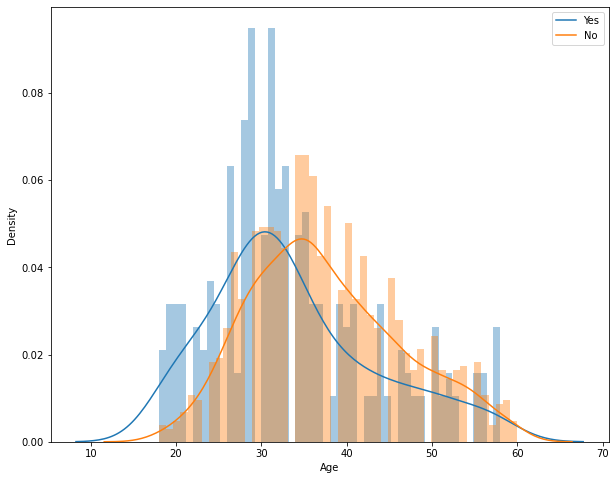

In [13]:
#Relating Age with Attrition
plt.figure(figsize =(10,8))
filt= (nt["At"] == 1)
sns.distplot(nt['Age'].loc[filt], kde = True, norm_hist= True, bins = 50)
filt1= (nt["At"] == 0)
sns.distplot(nt['Age'].loc[filt1], kde = True, norm_hist= True, bins =50)
plt.legend(['Yes', 'No'])

In the above graph number of employees with younger age like between 28-30 are leaving their job as comapred to other age group

<AxesSubplot:xlabel='Age', ylabel='count'>

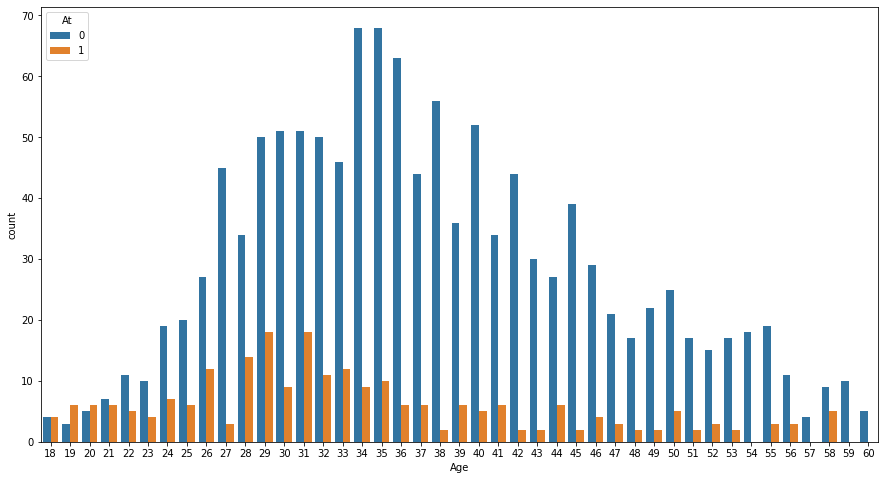

In [14]:
plt.figure(figsize =(15,8))
sns.countplot('Age', hue = 'At',data =nt)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

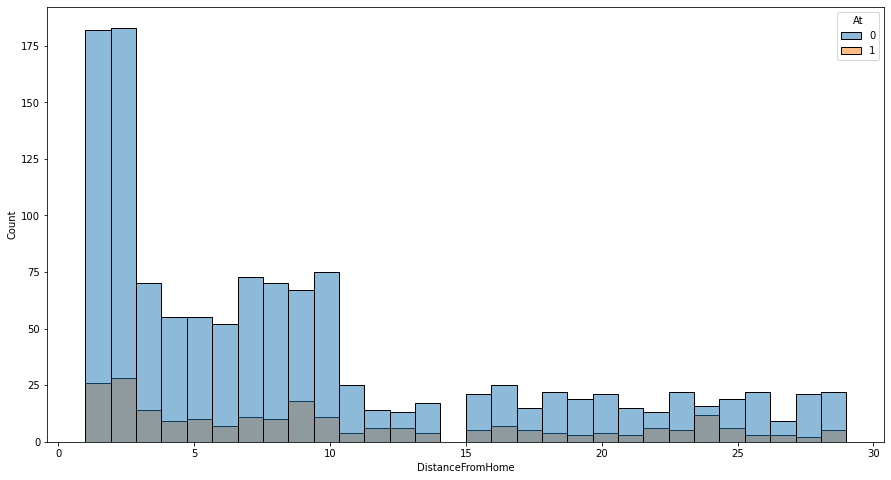

In [15]:
plt.figure(figsize =(15,8))
sns.histplot(x = nt['DistanceFromHome'], hue = nt['At'], bins = 30 )

No significant difference in the positive or negative rate among the Environment Satisfaction

<AxesSubplot:xlabel='DailyRate', ylabel='Count'>

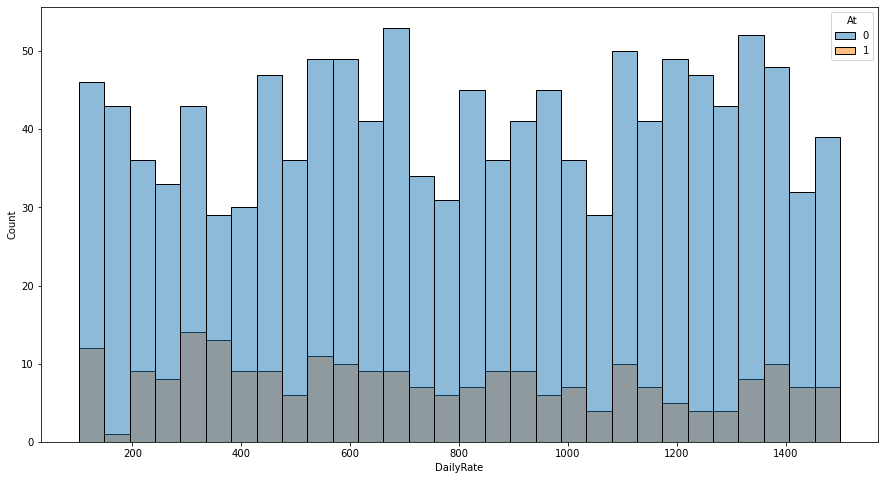

In [16]:
plt.figure(figsize =(15,8))
sns.histplot(x = nt['DailyRate'], hue = nt['At'], bins = 30 )

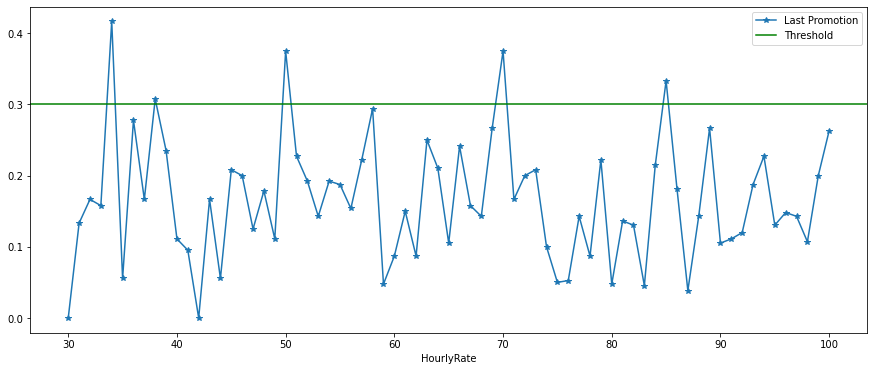

{34: 0.4166666666666667,
 38: 0.3076923076923077,
 50: 0.375,
 70: 0.375,
 85: 0.3333333333333333}

In [17]:
plt.figure(figsize = (15,6))
nt.groupby('HourlyRate')['At'].mean().plot(kind = 'line', marker ='*')
plt.axhline(y=0.3, color = 'green')
plt.legend(['Last Promotion', 'Threshold'])
plt.show()
hr ={}
for i in range(30,101):
    if (nt.groupby('HourlyRate')['At'].mean().loc[i]>0.3):
        hr[i] = nt.groupby('HourlyRate')['At'].mean().loc[i]
        
hr

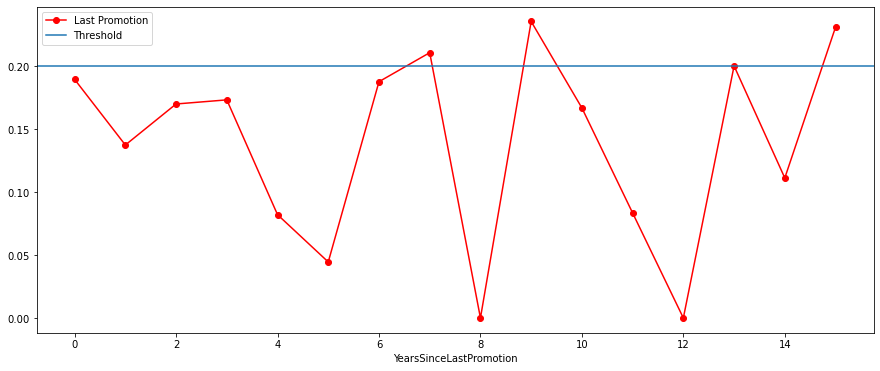

{7: 0.21052631578947367,
 9: 0.23529411764705882,
 13: 0.2,
 15: 0.23076923076923078}

In [18]:
#Relationship between Years since last pomotion with Attrition
plt.figure(figsize = (15,6))
nt.groupby('YearsSinceLastPromotion')['At'].mean().plot(kind = 'line', marker = 'o', color = 'red')
plt.axhline(y=0.2)
plt.legend(['Last Promotion', 'Threshold'])
plt.show()
yslp ={}
for i in range(16):
    if (nt.groupby('YearsSinceLastPromotion')['At'].mean().loc[i]>=0.2):
        yslp[i] = nt.groupby('YearsSinceLastPromotion')['At'].mean().loc[i]

yslp

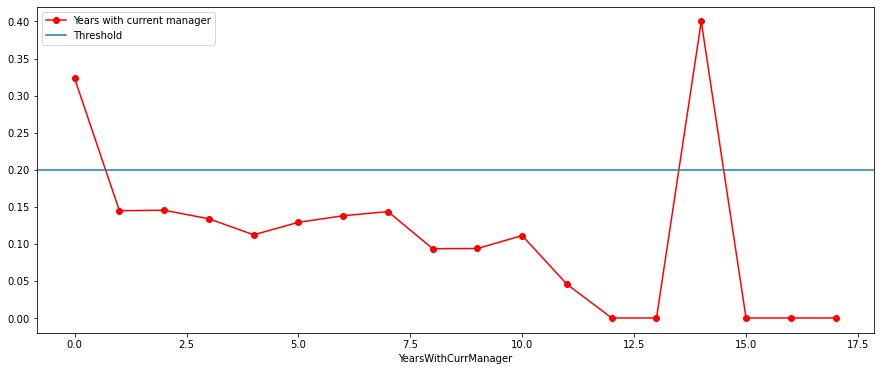

{0: 0.3231939163498099, 14: 0.4}

In [19]:
#Relationship between Years with current Manager with Attrition
plt.figure(figsize = (15,6))
nt.groupby('YearsWithCurrManager')['At'].mean().plot(kind = 'line', marker = 'o', color = 'red')
plt.axhline(y=0.2)
plt.legend(['Years with current manager', 'Threshold'])
plt.show()
ywcm ={}
for i in range(len(nt['YearsWithCurrManager'].unique())):
    if (nt.groupby('YearsWithCurrManager')['At'].mean().loc[i]>=0.2):
        ywcm[i] = nt.groupby('YearsWithCurrManager')['At'].mean().loc[i]
        
ywcm        

0 and 14 Years with manager have higher tendency to leave

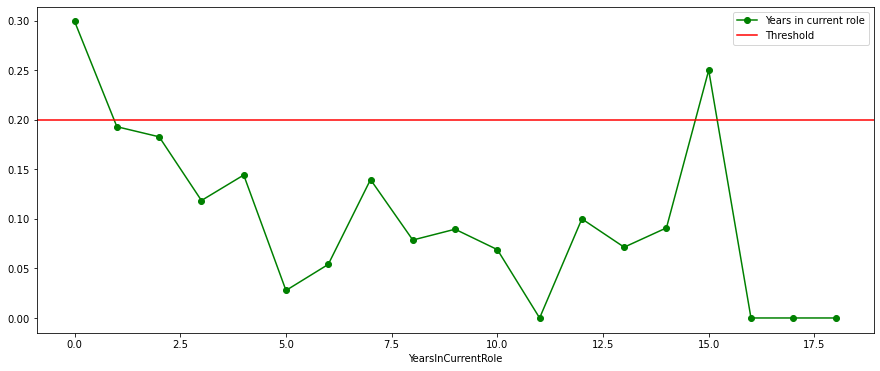

{0: 0.29918032786885246, 15: 0.25}

In [20]:
#Relationship between Years In Current Role with Attrition
plt.figure(figsize = (15,6))
nt.groupby('YearsInCurrentRole')['At'].mean().plot(kind = 'line', marker = 'o', color = 'green')
plt.axhline(y=0.2, color = 'red')
sns.lineplot(x='Profile', y='Fees', data = p, marker = 'o', color = 'blue')

ywcr ={}
for i in range(len(nt['YearsInCurrentRole'].unique())):
    if (nt.groupby('YearsInCurrentRole')['At'].mean().loc[i]>=0.2):
        ywcr[i] = nt.groupby('YearsInCurrentRole')['At'].mean().loc[i]
        
ywcr

People have higher tendency to leaves imidiately after getting the role or after 15 years in the role

# Feature Engineering

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Label Encoding for object features

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.select_dtypes(include = object):
    df[col]=le.fit_transform(df[col])

### Normalizing the data

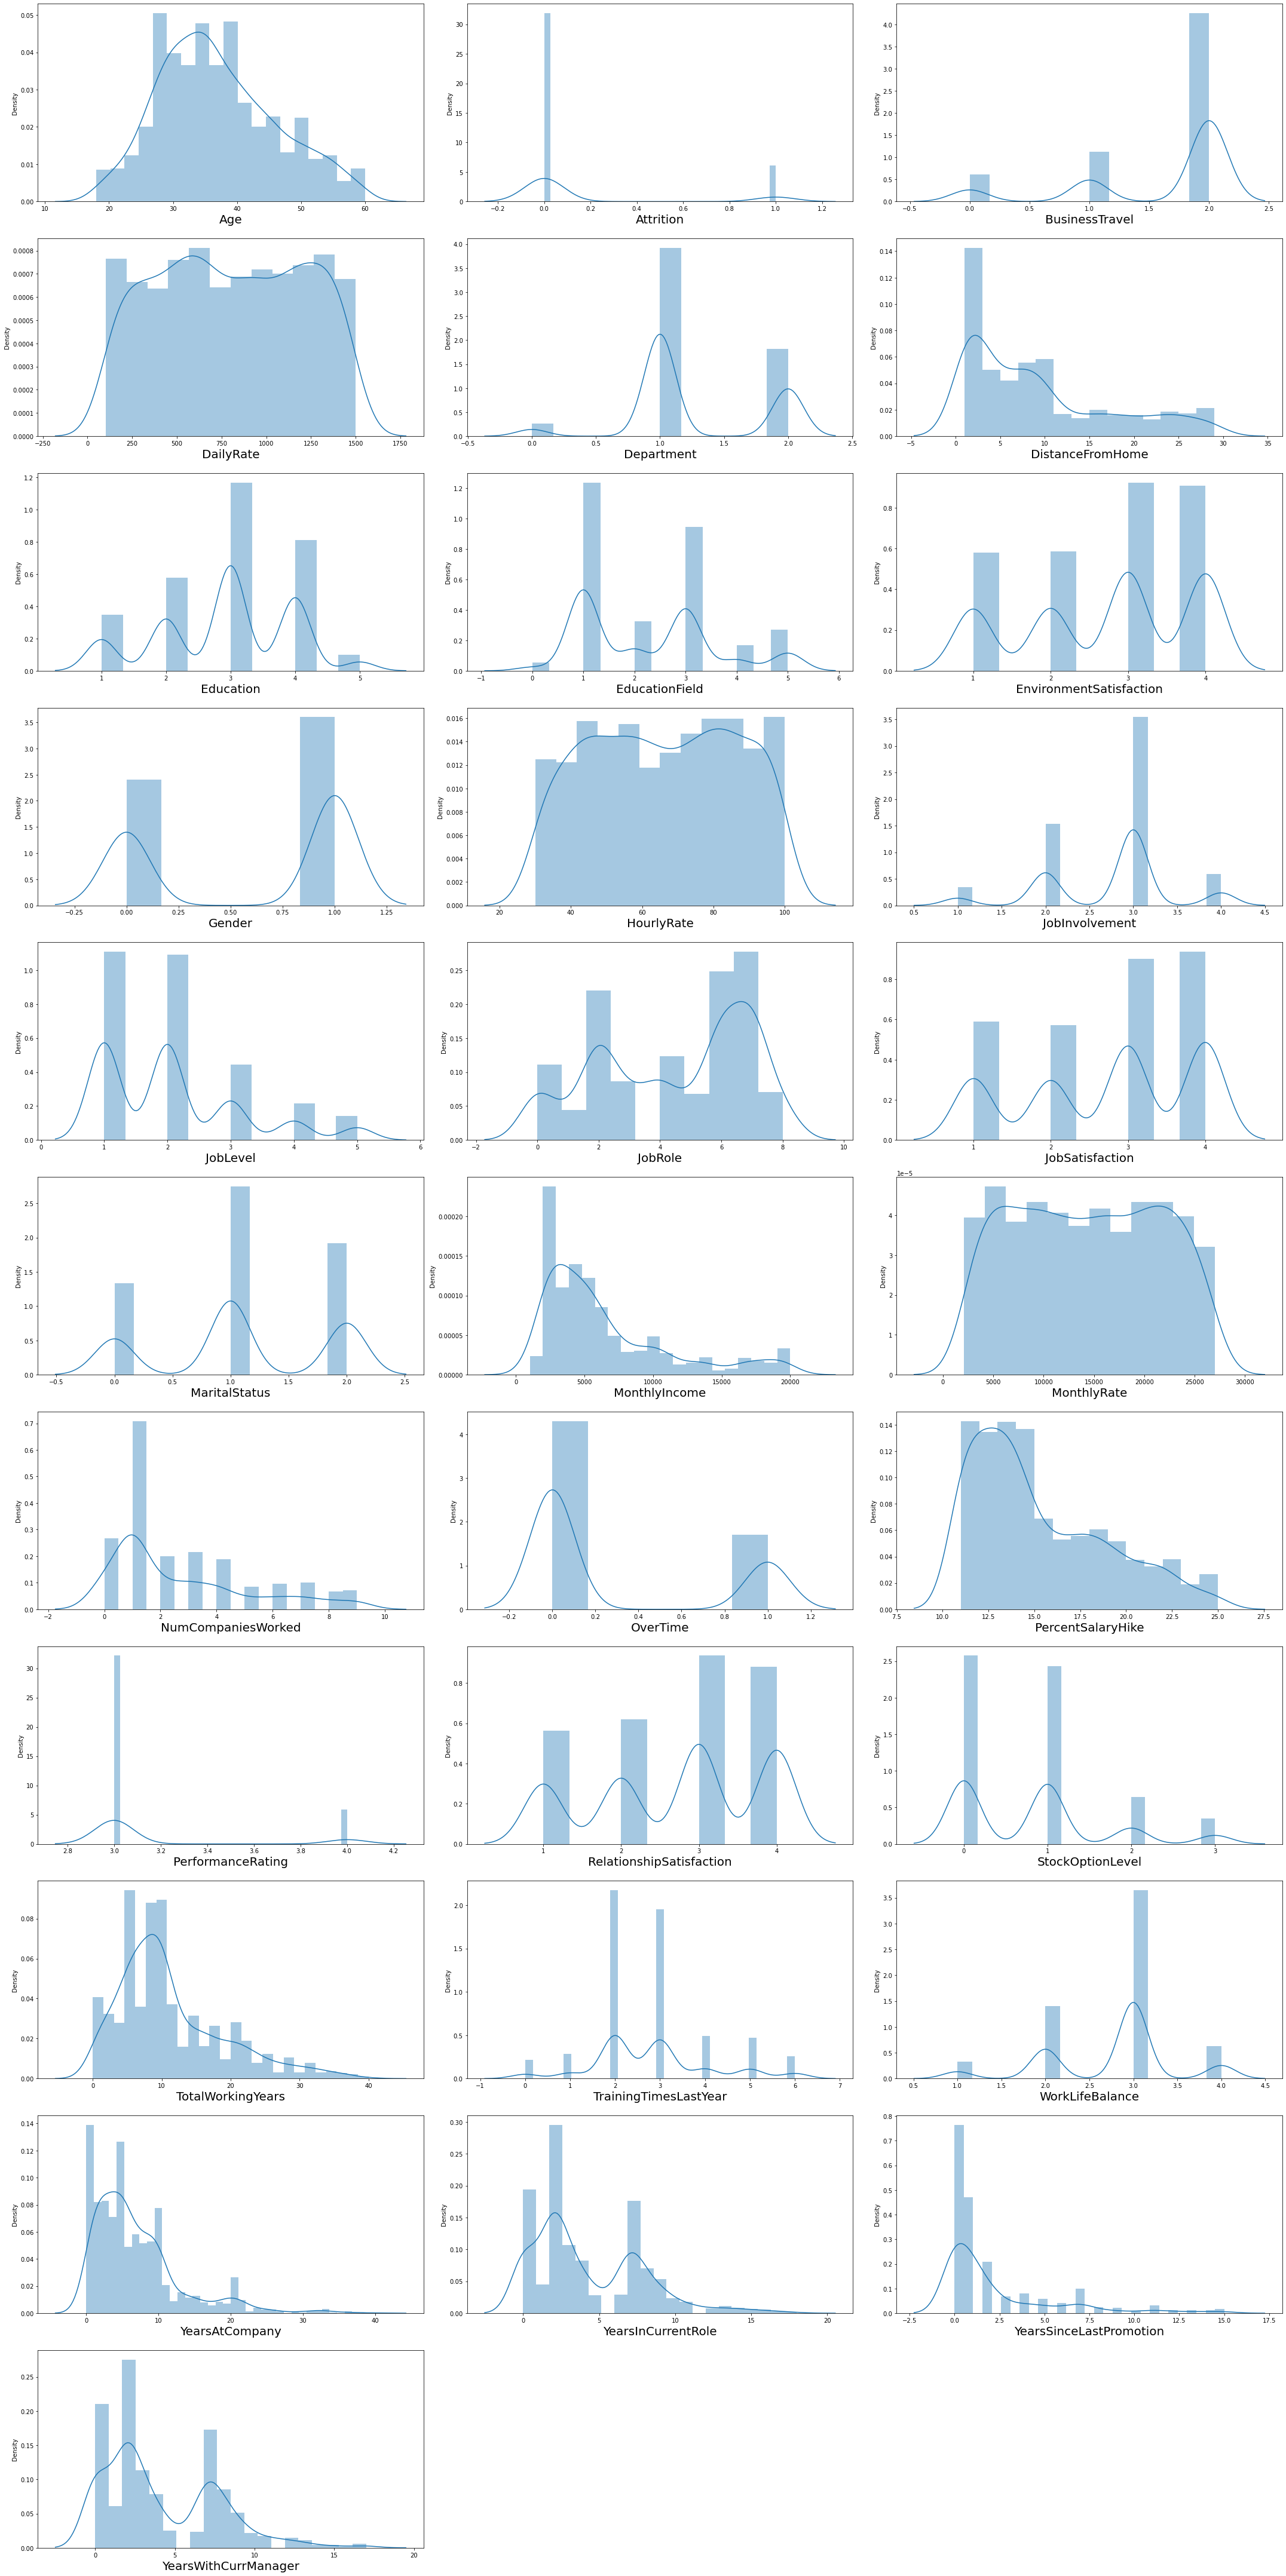

In [23]:
#Visualizing the distrubution of the features
plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1
for column in df:
    ax = plt.subplot(11,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [24]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [25]:
tf=df.copy()

In [26]:
for col in tf.columns:
    if tf[col].skew()>0.55:
        tf[col]=np.log1p(tf[col])

### Removing Outliers

In [27]:
from scipy.stats import zscore
z_score=np.abs(zscore(tf))
tf=tf[(z_score<3).all(axis=1)]

### Scaling Data

In [28]:
from sklearn.preprocessing import MinMaxScaler
mimax = MinMaxScaler()
tf_s=mimax.fit_transform(tf)

In [29]:
tfs = pd.DataFrame(tf_s, columns = tf.columns)

In [30]:
tfs.skew()

Age                         0.441847
Attrition                   1.908091
BusinessTravel             -1.457776
DailyRate                  -0.007131
Department                  0.168318
DistanceFromHome           -0.025438
Education                  -0.287652
EducationField             -0.049764
EnvironmentSatisfaction    -0.317798
Gender                     -0.403843
HourlyRate                 -0.021027
JobInvolvement             -0.506085
JobLevel                    0.427342
JobRole                    -0.342840
JobSatisfaction            -0.311318
MaritalStatus              -0.143316
MonthlyIncome               0.299863
MonthlyRate                 0.025940
NumCompaniesWorked          0.084062
OverTime                    0.975821
PercentSalaryHike           0.521022
PerformanceRating           1.923191
RelationshipSatisfaction   -0.294686
StockOptionLevel            0.257371
TotalWorkingYears          -0.503939
TrainingTimesLastYear       0.234096
WorkLifeBalance            -0.550361
Y

## Balancing Data - Oversampling

In [31]:
#data splitting
x= tfs.drop('Attrition',axis =1)
y=tfs['Attrition']

In [32]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x,y=smk.fit_sample(x,y)

In [33]:
x.shape,y.shape

((2374, 30), (2374,))

# Model Creation and Prediction

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
#Making model using the basic classification models
models =[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]
for m in models:
    acc = 0
    for r in range(100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=r)
        m.fit(x_train,y_train)
        y_pred =m.predict(x_test)
        m_acc = accuracy_score(y_test, y_pred)
        
        if m_acc > acc:
            acc = m_acc
            r_state = r
    print(f'The maximum accuracy of the {m} is {m_acc} at random state {r_state} \n')     

The maximum accuracy of the LogisticRegression() is 0.8105263157894737 at random state 5 

The maximum accuracy of the DecisionTreeClassifier() is 0.8589473684210527 at random state 71 

The maximum accuracy of the SVC() is 0.9031578947368422 at random state 69 

The maximum accuracy of the KNeighborsClassifier() is 0.84 at random state 96 

The maximum accuracy of the GaussianNB() is 0.7305263157894737 at random state 16 



### SVC gives maximum accuracy of 90% at a random state of 69

In [36]:
#cross validating the result
from sklearn.model_selection import cross_val_score
models =[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]
for m in models:    
    cv = cross_val_score(m,x,y,cv=5)
    print('score of ',m)
    print('mean score', cv.mean())
    print("Standard deviation",cv.std())
    print('---------------------------------------------------------------')

score of  LogisticRegression()
mean score 0.8117130801687764
Standard deviation 0.007412952924274636
---------------------------------------------------------------
score of  DecisionTreeClassifier()
mean score 0.8580572951365756
Standard deviation 0.061882972160782465
---------------------------------------------------------------
score of  SVC()
mean score 0.9026995336442372
Standard deviation 0.017565061701392545
---------------------------------------------------------------
score of  KNeighborsClassifier()
mean score 0.8222314012880302
Standard deviation 0.01349606957245953
---------------------------------------------------------------
score of  GaussianNB()
mean score 0.7329398178991783
Standard deviation 0.031522259340133266
---------------------------------------------------------------


SVC gives a maximum accuracy with balanced data

In [38]:
#searching for best parameters (TUNING the model)
svc=SVC()
parameters={ 'C':[1.0,2.0,3.0], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
            'gamma':['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']}
gss=GridSearchCV(svc,parameters)
gss.fit(x,y)
gss.best_params_

{'C': 3.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

In [40]:
# making SVC model using best parameters
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=69)
svc=SVC(C=3.0, decision_function_shape='ovo', gamma='scale', kernel= 'rbf')

svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy score of logistic regression is',accuracy_score(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('classification matrix\n',classification_report(y_test,y_pred)) 

Accuracy score of logistic regression is 0.9578947368421052
Confusion matrix
 [[228  15]
 [  5 227]]
classification matrix
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       243
         1.0       0.94      0.98      0.96       232

    accuracy                           0.96       475
   macro avg       0.96      0.96      0.96       475
weighted avg       0.96      0.96      0.96       475



## Using Ensembler technique

### Bagging technique - RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9578947368421052
[[240   3]
 [ 17 215]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       243
         1.0       0.99      0.93      0.96       232

    accuracy                           0.96       475
   macro avg       0.96      0.96      0.96       475
weighted avg       0.96      0.96      0.96       475



### Boosting technique - Adaboost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100,learning_rate=0.1)
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8
[[186  57]
 [ 38 194]]
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       243
         1.0       0.77      0.84      0.80       232

    accuracy                           0.80       475
   macro avg       0.80      0.80      0.80       475
weighted avg       0.80      0.80      0.80       475



### SVC and RandomForest gives the best model for the balanced data

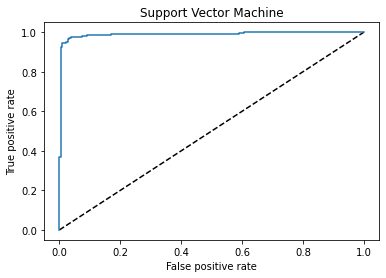

auc_score 0.9583599404001703


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=69)

svc=SVC(C=3.0, decision_function_shape='ovo',probability=True, gamma='scale', kernel= 'rbf')

svc.fit(x_train,y_train)
y_pred=svc.predict_proba(x_test)[:,1]

tpr,fpr,thresholds=roc_curve(y_test,y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Machine')
plt.show()

auc_score=roc_auc_score(y_test,svc.predict(x_test))
print("auc_score", auc_score)

In [47]:
import joblib
joblib.dump(svc,"svc.hr_shiv.pkl")

['svc.hr_shiv.pkl']